In [1]:
import pandas as pd
from matplotlib import cm
import numpy as np
from math import floor, ceil
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from Preprocess import *
from plot import *
markers=['.','+','x','_',',','|','1','2','3','4','8','>','<']
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c
# cmap3 = plt.cm.hot
C =ListedColormap (np.random.rand (20,3)).colors


## MLP


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
file1=['./data/robot/4/','4.csv']
file1=['./data/robot/24/','24.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
X=np.concatenate((X_train,X_test), axis=0)
y=np.concatenate((y_train,y_test), axis=0)

X_train, X_test, y_train, y_test = \
        train_test_split(X,y, test_size=0.5, random_state=1)   
    
mlp = MLPClassifier(hidden_layer_sizes=(100,50,50,), max_iter=200, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.05)
mlp.fit(X_train, y_train)

label=mlp.classes_


print("Training set score: %f" % mlp.score(X_train, y_train),len(y_train))

print("Test set score: %f" % mlp.score(X_test, y_test),len(y_test))

Iteration 1, loss = 2.05069526
Iteration 2, loss = 0.96878267
Iteration 3, loss = 0.85027343
Iteration 4, loss = 0.80971546
Iteration 5, loss = 0.70551660
Iteration 6, loss = 0.63379586
Iteration 7, loss = 0.57687496
Iteration 8, loss = 0.62447254
Iteration 9, loss = 0.59622849
Iteration 10, loss = 0.54628587
Iteration 11, loss = 0.56968258
Iteration 12, loss = 0.57137599
Iteration 13, loss = 0.54023119
Iteration 14, loss = 0.48985915
Iteration 15, loss = 0.48916786
Iteration 16, loss = 0.47171703
Iteration 17, loss = 0.45183751
Iteration 18, loss = 0.45657335
Iteration 19, loss = 0.45320483
Iteration 20, loss = 0.45309951
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
('Training set score: 0.855886', 2727)
('Test set score: 0.838710', 2728)


Progress: 1
Progress: 2
Progress: 3
Progress: 4
Progress: 5
Progress: 6
Progress: 7
Progress: 8
Progress: 9
Progress: 10
Progress: 11
Progress: 12
Progress: 13
Progress: 14
Progress: 15


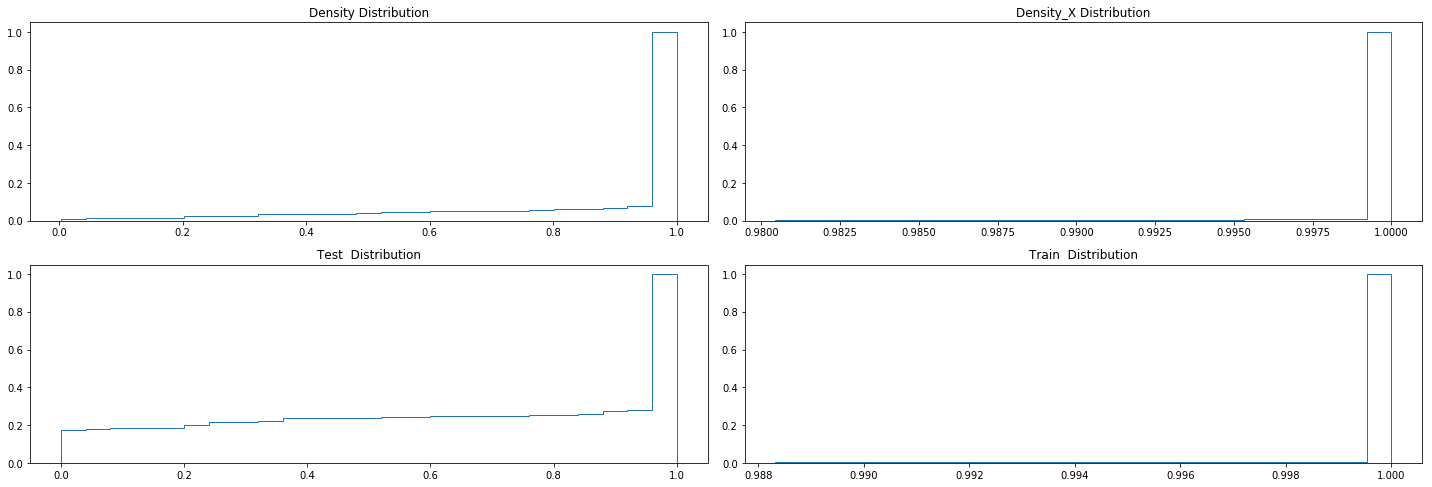

In [128]:
X_train, X_test, y_train, y_test = read_data(file1[0])
  
    
figure = plt.figure(figsize=(20, 10))


"""
Train CLTree
"""
tree=CLTree(criterion='gini',min_samples_leaf=5, max_depth=50,gain_ratio_threshold=0.00001)
tree.fit(X_train,1,1)
yt=tree.predict(X_train)
yp=tree.predict(X_test)

# inds=[yp<0.1,np.logical_and(yp>=0.1,yp<0.2),np.logical_and(yp>=0.2,yp<0.3),\
#     np.logical_and(yp>=0.3,yp<0.4),np.logical_and(yp>=0.4,yp<0.5),np.logical_and(yp>=0.6,yp<0.7),\
#     np.logical_and(yp>=0.6,yp<0.7),np.logical_and(yp>=0.7,yp<0.8),np.logical_and(yp>=0.8,yp<0.9),\
#     np.logical_and(yp>=0.9,yp<0.95),np.logical_and(yp>=0.95,yp<1)]
# inds=[yp<threshold,yp>=threshold]


ax = plt.subplot(3, 2, 1)
ax.set_title("Density Distribution")
plt.hist(tree.density[tree.density>0],bins=25,density=True, histtype='step',cumulative=True)
ax = plt.subplot(3, 2, 2)
ax.set_title("Density_X Distribution")
plt.hist(tree.density_X[tree.density_X>0],bins=25,density=True, histtype='step',cumulative=True)


ax = plt.subplot(3, 2, 3)
ax.set_title("Test  Distribution")
plt.hist(yp,bins=25,density=True, histtype='step',cumulative=True)
ax = plt.subplot(3, 2, 4)
ax.set_title("Train  Distribution")
plt.hist(yt,bins=25,density=True, histtype='step',cumulative=True)

plt.legend()
plt.tight_layout()
plt.show()




In [129]:
X_train, X_test, y_train, y_test = read_data(file1[0])
 
mlp = MLPClassifier(hidden_layer_sizes=(100,50,50,), max_iter=200, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.05)
mlp.fit(X_train, y_train)

label=mlp.classes_


print("Training set score: %f" % mlp.score(X_train, y_train),len(y_train))

print("Test set score: %f" % mlp.score(X_test, y_test),len(y_test))

# figure = plt.figure(figsize=(10, 5))

# ax = plt.subplot(1, 2, 1)
# ax.set_title("train data")
# y_pred= np.array(mlp.predict_proba(X_train))
# y_pred_index=np.argmax(y_pred, axis=1)
# yh= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y_train,y_pred)])    
# ymlp= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])

# plt.hist(ymlp,bins=25,density=True, histtype='step',cumulative=True)

# ax = plt.subplot(1, 2, 2)
# ax.set_title("test data")
# y_pred= np.array(mlp.predict_proba(X_test))
# y_pred_index=np.argmax(y_pred, axis=1)
# yh= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y_test,y_pred)])    
# ymlp= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])

# plt.hist(ymlp,bins=25,density=True, histtype='step',cumulative=True)


# plt.legend()
# plt.tight_layout()
# plt.show()
    


Iteration 1, loss = 2.31683044
Iteration 2, loss = 0.65767381
Iteration 3, loss = 0.48517642
Iteration 4, loss = 0.35829051
Iteration 5, loss = 0.29863931
Iteration 6, loss = 0.25273259
Iteration 7, loss = 0.24576497
Iteration 8, loss = 0.22074634
Iteration 9, loss = 0.18536231
Iteration 10, loss = 0.17151094
Iteration 11, loss = 0.17324912
Iteration 12, loss = 0.16163776
Iteration 13, loss = 0.16079548
Iteration 14, loss = 0.14877946
Iteration 15, loss = 0.14802360
Iteration 16, loss = 0.12919154
Iteration 17, loss = 0.13003472
Iteration 18, loss = 0.15304100
Iteration 19, loss = 0.17940458
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
('Training set score: 0.966642', 2728)
('Test set score: 0.546021', 2727)


In [139]:
yt.sort()
k=int(floor(len(yt)*0.1))
threshold=yt[k]
print 'Threshold',threshold



yp=tree.predict(X_test)


label=mlp.classes_
y_pred= np.array(mlp.predict_proba(X_test))
y_pred_index=np.argmax(y_pred, axis=1)
yh= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y_test,y_pred)])    
ymlp= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])
    


# id1=(ymlp<0.8)

# id2=(ymlp>=0.99)
    
id1=yp<threshold
id2=yp>=threshold

print "Test Uncertain", accuracy_score(yh.T[0][id1], yh.T[1][id1]), len(yh.T[1][id1])
print "Test certain", accuracy_score(yh.T[0][id2], yh.T[1][id2]),len(yh.T[1][id2])



Threshold 1.0
Test Uncertain 0.527077497666 2142
Test certain 0.615384615385 585
